In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [472]:
#Read the data and print out some rows
data = pd.read_csv('Covid_stats.csv', encoding='latin1')
data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotÿCases/1M pop,...,TotalTests,Tests/\r\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,NaN,NaN,"2,348"
1,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,NaN,NaN,0.4
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,NaN,NaN,NaN
3,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,NaN,NaN,"4,833"
4,Brazil,"38,743,918",NaN,"711,380",NaN,"36,249,161",NaN,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,NaN,NaN,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,NaN,NaN,NaN,NaN,NaN,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,NaN,NaN,NaN,"58,055"
227,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",NaN,NaN,NaN,NaN
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [473]:
data_copy = data.copy()

In [474]:
data_copy

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotÿCases/1M pop,...,TotalTests,Tests/\r\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,NaN,NaN,"2,348"
1,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,NaN,NaN,0.4
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,NaN,NaN,NaN
3,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,NaN,NaN,"4,833"
4,Brazil,"38,743,918",NaN,"711,380",NaN,"36,249,161",NaN,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,NaN,NaN,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,NaN,NaN,NaN,NaN,NaN,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,NaN,NaN,NaN,"58,055"
227,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",NaN,NaN,NaN,NaN
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
data_copy.rename(columns={
    'Country,Other': 'Country',
    'Serious,Critical': 'Serious',
    'TotÿCases/1M pop': 'TotalCases_per_1M',
    'Deaths/1M pop': 'Deaths_per_1M',
    'Tests/\r\n1M pop': 'Tests_per_1M',
    '1 Caseevery X ppl': '1_Case_every_X_ppl',
    '1 Deathevery X ppl': '1_Death_every_X_ppl',
    '1 Testevery X ppl': '1_Test_every_X_ppl', 
    'New Cases/1M pop': 'New_Cases_per_1M',
    'New Deaths/1M pop': 'New_Deaths_per_1M',
    'Active Cases/1M pop': 'Active_Cases_per_1M'
}, inplace=True)
# Handle missing values (impute with 0 for numerical columns)
numerical_cols = data_copy.select_dtypes(include=np.number).columns
data_copy[numerical_cols] = data_copy[numerical_cols].fillna(0)




In [476]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,"111,820,082",0.00,"1,219,487",0.00,"109,814,428",0.00,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.00,0.00,0.00,"2,348"
1,India,"45,035,393",0.00,"533,570",0.00,NaN,0.00,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.00,0.00,0.00,0.4
2,France,"40,138,560",0.00,"167,642",0.00,"39,970,918",0.00,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.00,0.00,0.00,NaN
3,Germany,"38,828,995",0.00,"183,027",0.00,"38,240,600",0.00,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.00,0.00,0.00,"4,833"
4,Brazil,"38,743,918",0.00,"711,380",0.00,"36,249,161",0.00,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.00,0.00,0.00,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,NaN,0.00,NaN,0.00,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,0.00,0.00,0.00,"58,055"
227,Vatican City,29,0.00,NaN,0.00,29,0.00,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,0.00,0.00,0.00,NaN
228,Western Sahara,10,0.00,1,0.00,9,0.00,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",0.00,0.00,0.00,NaN
229,MS Zaandam,9,0.00,2,0.00,7,0.00,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN


In [477]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    object 
 2   NewCases             231 non-null    float64
 3   TotalDeaths          226 non-null    object 
 4   NewDeaths            231 non-null    float64
 5   TotalRecovered       183 non-null    object 
 6   NewRecovered         231 non-null    float64
 7   ActiveCases          184 non-null    object 
 8   Serious              53 non-null     object 
 9   TotalCases_per_1M    229 non-null    object 
 10  Deaths_per_1M        224 non-null    object 
 11  TotalTests           212 non-null    object 
 12  Tests_per_1M         212 non-null    object 
 13  Population           228 non-null    object 
 14  Continent            228 non-null    object 
 15  1_Case_every_X_ppl   228 non-null    obj

In [478]:

numeric_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
                   'Serious', 'TotalCases_per_1M', 'Deaths_per_1M',
                   'TotalTests', 'Tests_per_1M', 'Population',
                   '1_Case_every_X_ppl', '1_Death_every_X_ppl', '1_Test_every_X_ppl',
                   'New_Cases_per_1M', 'New_Deaths_per_1M', 'Active_Cases_per_1M']

for col in numeric_columns:
    data_copy[col] = data_copy[col].astype(str).str.replace(',', '', regex=False)
    data_copy[col] = pd.to_numeric(data_copy[col], errors='coerce')  # Convert and coerce errors to NaN
    data_copy[col] = data_copy[col].fillna(0) # fill any new NaNs from conversion
        

# Thay thế NaN trong cột string bằng chuỗi rỗng hoặc giá trị mặc định


In [479]:
data_copy

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,...,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,New_Cases_per_1M,New_Deaths_per_1M,Active_Cases_per_1M
0,USA,111820082,0.00,1219487.00,0.00,109814428.00,0.00,786167.00,940.00,333985.00,...,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,0.00,0.00,2348.00
1,India,45035393,0.00,533570.00,0.00,0.00,0.00,0.00,0.00,32016.00,...,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.00,0.00,0.40
2,France,40138560,0.00,167642.00,0.00,39970918.00,0.00,0.00,0.00,612013.00,...,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00,0.00,0.00
3,Germany,38828995,0.00,183027.00,0.00,38240600.00,0.00,405368.00,0.00,462891.00,...,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,0.00,0.00,4833.00
4,Brazil,38743918,0.00,711380.00,0.00,36249161.00,0.00,1783377.00,0.00,179908.00,...,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,0.00,0.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,0.00,0.00,80.00,0.00,58055.00,...,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,0.00,0.00,29.00,0.00,0.00,0.00,36295.00,...,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00,0.00,0.00
228,Western Sahara,10,0.00,1.00,0.00,9.00,0.00,0.00,0.00,16.00,...,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00,0.00,0.00
229,MS Zaandam,9,0.00,2.00,0.00,7.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [480]:
cot_bang_khong = data_copy.columns[data_copy.eq(0.00).all()]
data_copy = data_copy.drop(columns = cot_bang_khong)
data_copy

,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,USA,111820082,1219487.00,109814428.00,0.00,786167.00,940.00,333985.00,3642.00,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,2348.00
1,India,45035393,533570.00,0.00,0.00,0.00,0.00,32016.00,379.00,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.40
2,France,40138560,167642.00,39970918.00,0.00,0.00,0.00,612013.00,2556.00,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00
3,Germany,38828995,183027.00,38240600.00,0.00,405368.00,0.00,462891.00,2182.00,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,4833.00
4,Brazil,38743918,711380.00,36249161.00,0.00,1783377.00,0.00,179908.00,3303.00,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,80.00,0.00,58055.00,0.00,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,29.00,0.00,0.00,0.00,36295.00,0.00,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00
228,Western Sahara,10,1.00,9.00,0.00,0.00,0.00,16.00,2.00,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00
229,MS Zaandam,9,2.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00


In [481]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    int64  
 2   TotalDeaths          231 non-null    float64
 3   TotalRecovered       231 non-null    float64
 4   NewRecovered         231 non-null    float64
 5   ActiveCases          231 non-null    float64
 6   Serious              231 non-null    float64
 7   TotalCases_per_1M    231 non-null    float64
 8   Deaths_per_1M        231 non-null    float64
 9   TotalTests           231 non-null    float64
 10  Tests_per_1M         231 non-null    float64
 11  Population           231 non-null    float64
 12  Continent            228 non-null    object 
 13  1_Case_every_X_ppl   231 non-null    float64
 14  1_Death_every_X_ppl  231 non-null    float64
 15  1_Test_every_X_ppl   231 non-null    flo

In [482]:
data_copy.Continent = data_copy.Continent.fillna("")
data_copy.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              231 non-null    object 
 1   TotalCases           231 non-null    int64  
 2   TotalDeaths          231 non-null    float64
 3   TotalRecovered       231 non-null    float64
 4   NewRecovered         231 non-null    float64
 5   ActiveCases          231 non-null    float64
 6   Serious              231 non-null    float64
 7   TotalCases_per_1M    231 non-null    float64
 8   Deaths_per_1M        231 non-null    float64
 9   TotalTests           231 non-null    float64
 10  Tests_per_1M         231 non-null    float64
 11  Population           231 non-null    float64
 12  Continent            231 non-null    object 
 13  1_Case_every_X_ppl   231 non-null    float64
 14  1_Death_every_X_ppl  231 non-null    float64
 15  1_Test_every_X_ppl   231 non-null    flo

In [483]:
data_copy

,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,USA,111820082,1219487.00,109814428.00,0.00,786167.00,940.00,333985.00,3642.00,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,2348.00
1,India,45035393,533570.00,0.00,0.00,0.00,0.00,32016.00,379.00,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.40
2,France,40138560,167642.00,39970918.00,0.00,0.00,0.00,612013.00,2556.00,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00
3,Germany,38828995,183027.00,38240600.00,0.00,405368.00,0.00,462891.00,2182.00,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,4833.00
4,Brazil,38743918,711380.00,36249161.00,0.00,1783377.00,0.00,179908.00,3303.00,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,80.00,0.00,58055.00,0.00,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,29.00,0.00,0.00,0.00,36295.00,0.00,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00
228,Western Sahara,10,1.00,9.00,0.00,0.00,0.00,16.00,2.00,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00
229,MS Zaandam,9,2.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00


In [484]:
continent_list_data = ['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America']
for i in range (len(continent_list_data)):
    continent_list_data[i] = data_copy.loc[data_copy['Continent'] == continent_list_data[i]]
continent_list_data[0]



,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
1,India,45035393,533570.00,0.00,0.00,0.00,0.00,32016.00,379.00,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.40
5,S. Korea,34571873,35934.00,34535939.00,0.00,0.00,0.00,673523.00,700.00,15804065.00,307892.00,51329899.00,Asia,1.00,1428.00,3.00,0.00
6,Japan,33803572,74694.00,0.00,0.00,0.00,0.00,269169.00,595.00,100414883.00,799578.00,125584838.00,Asia,4.00,1681.00,1.00,95582.00
10,Turkey,17232066,102174.00,0.00,0.00,0.00,0.00,201399.00,1194.00,162743369.00,1902052.00,85561976.00,Asia,5.00,837.00,1.00,4024.00
13,Vietnam,11625195,43206.00,10640971.00,0.00,941018.00,0.00,117481.00,437.00,85826548.00,867342.00,98953541.00,Asia,9.00,2290.00,1.00,9510.00
14,Taiwan,10241523,19005.00,10222518.00,0.00,0.00,0.00,428720.00,796.00,30742304.00,1286903.00,23888595.00,Asia,2.00,1257.00,1.00,0.00
18,Iran,7627186,146811.00,0.00,0.00,0.00,0.00,88665.00,1707.00,57320267.00,666338.00,86022837.00,Asia,11.00,586.00,2.00,1199.00
19,Indonesia,6829221,162063.00,6647104.00,0.00,20054.00,0.00,24466.00,581.00,114158919.00,408975.00,279134505.00,Asia,41.00,1722.00,2.00,72.00
27,Malaysia,5278406,37348.00,5233268.00,0.00,7790.00,11.00,159079.00,1126.00,68580916.00,2066869.00,33181072.00,Asia,6.00,888.00,0.00,235.00
30,Israel,4841772,12707.00,4798473.00,0.00,30592.00,0.00,519169.00,1363.00,41373364.00,4436346.00,9326000.00,Asia,2.00,734.00,0.00,3280.00


In [485]:
data_continent = {'Continent':['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America'], 
                'TotalCases':[]   ,        
                'TotalDeaths':[],   
                'TotalRecovered':[],     
                'NewRecovered':[],      
                'ActiveCases':[],       
                'Serious':[],                    
                'TotalTests':[],                
                'Population' :[],               
                }
data_continent_mean = {'Continent':['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America'], 
                        'TotalCases_per_1M':[], 
                        'Deaths_per_1M':[],
                        'Tests_per_1M':[],
                        '1_Case_every_X_ppl':[],
                        '1_Death_every_X_ppl':[],
                        '1_Test_every_X_ppl':[],
                        'Active_Cases_per_1M':[]
                    }
for i in range(6):
    for column in data_continent.keys():
        
        if column == 'Continent':
            continue
        data_continent[column].append(int(continent_list_data[i][column].sum()))
for i in range(6):
    for column in data_continent_mean.keys():
        
        if column == 'Continent':
            continue
        data_continent_mean[column].append(int(continent_list_data[i][column].mean()))
data_continent = pd.DataFrame(data_continent)
data_continent


,Continent,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalTests,Population
0,Asia,220996963,1548390,108144976,0,1424087,370,2244652039,3262885383
1,Europe,253406198,2101824,235797174,474,875221,401,2848046702,747543837
2,Africa,12860924,258892,9211514,0,331499,389,111032578,1406728744
3,Australia/Oceania,14895771,33015,14615509,0,33714,6,91668192,43470408
4,South America,70200879,1367332,65935495,0,1999425,628,245395353,437694443
5,North America,131889132,1695941,126483239,350,1332790,1083,1325710449,598140916


In [486]:
data_continent_mean = pd.DataFrame(data_continent_mean)
data_continent_mean

,Continent,TotalCases_per_1M,Deaths_per_1M,Tests_per_1M,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,Asia,167982,718,1901375,97,12621,9,10120
1,Europe,399994,2697,4539232,3,469,0,31280
2,Africa,43286,319,188328,1424,36487,27,10151
3,Australia/Oceania,250161,485,1064661,18,5252,3,51858
4,South America,187173,2372,1002151,10,721,2,25667
5,North America,228463,1536,2610661,25,1970,3,71329


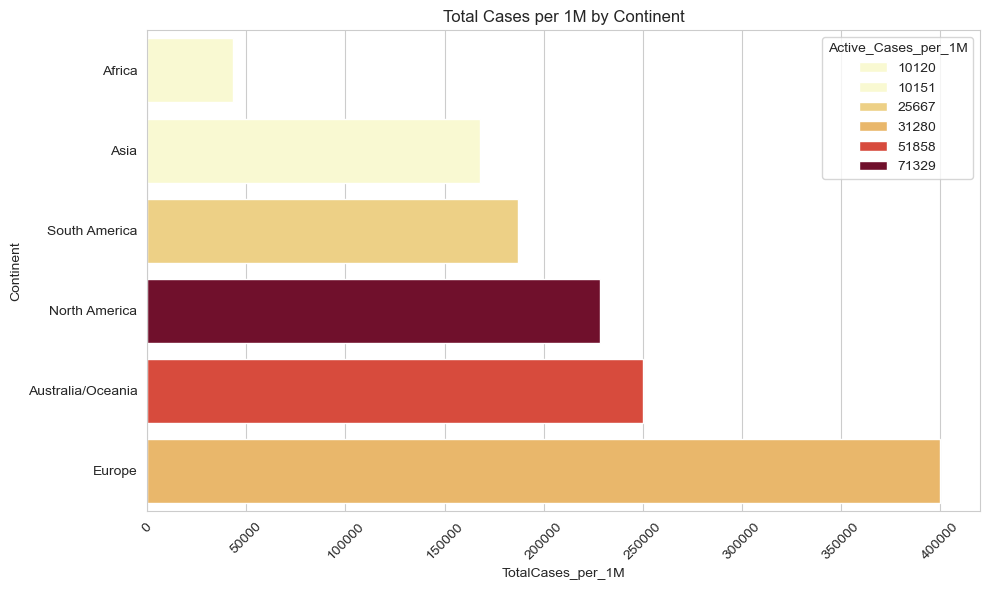

In [502]:
sns.set_style("whitegrid")

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(y='Continent', x='TotalCases_per_1M', data=data_continent_mean, palette='YlOrRd', order=data_continent_mean.sort_values('TotalCases_per_1M').Continent, hue = 'Active_Cases_per_1M')
plt.title('Total Cases per 1M by Continent')
plt.ylabel('Continent')
plt.xlabel('TotalCases_per_1M')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

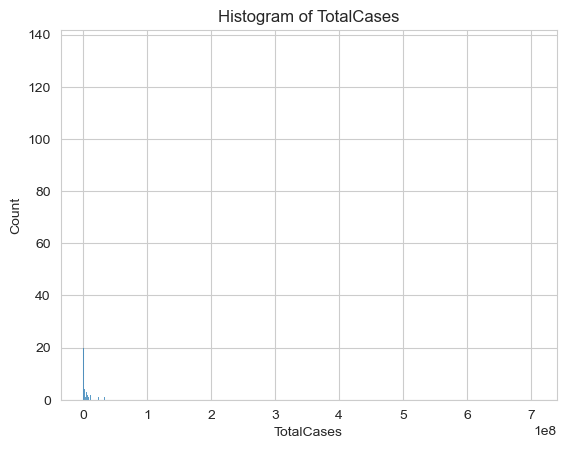

In [488]:

sns.histplot(data_copy, x="TotalCases")
#plt.xlim(0, 500000)

# Thêm tiêu đề và nhãn (tùy chọn)
plt.title('Histogram of TotalCases')
plt.xlabel('TotalCases')
plt.ylabel('Count')





In [489]:
data_copy

,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,USA,111820082,1219487.00,109814428.00,0.00,786167.00,940.00,333985.00,3642.00,1186851502.00,3544901.00,334805269.00,North America,3.00,275.00,0.00,2348.00
1,India,45035393,533570.00,0.00,0.00,0.00,0.00,32016.00,379.00,935879495.00,665334.00,1406631776.00,Asia,31.00,2636.00,2.00,0.40
2,France,40138560,167642.00,39970918.00,0.00,0.00,0.00,612013.00,2556.00,271490188.00,4139547.00,65584518.00,Europe,2.00,391.00,0.00,0.00
3,Germany,38828995,183027.00,38240600.00,0.00,405368.00,0.00,462891.00,2182.00,122332384.00,1458359.00,83883596.00,Europe,2.00,458.00,1.00,4833.00
4,Brazil,38743918,711380.00,36249161.00,0.00,1783377.00,0.00,179908.00,3303.00,63776166.00,296146.00,215353593.00,South America,6.00,303.00,3.00,8281.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Tokelau,80,0.00,0.00,0.00,80.00,0.00,58055.00,0.00,0.00,0.00,1378.00,Australia/Oceania,17.00,0.00,0.00,58055.00
227,Vatican City,29,0.00,29.00,0.00,0.00,0.00,36295.00,0.00,0.00,0.00,799.00,Europe,28.00,0.00,0.00,0.00
228,Western Sahara,10,1.00,9.00,0.00,0.00,0.00,16.00,2.00,0.00,0.00,626161.00,Africa,62616.00,626161.00,0.00,0.00
229,MS Zaandam,9,2.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,0.00,0.00,0.00,0.00


In [490]:
data_copy.columns


Index(['Country', 'TotalCases', 'TotalDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious', 'TotalCases_per_1M',
       'Deaths_per_1M', 'TotalTests', 'Tests_per_1M', 'Population',
       'Continent', '1_Case_every_X_ppl', '1_Death_every_X_ppl',
       '1_Test_every_X_ppl', 'Active_Cases_per_1M'],
      dtype='object')

In [491]:
data_ = {
    'Tên': ['An', 'Bình', 'Cường'],
    'Tuổi': [20, 25, 30],
    'Thành phố': ['Hà Nội', 'Sài Gòn', 'Đà Nẵng']
}

# Tạo DataFrame
df = pd.DataFrame(data_)
df

,Tên,Tuổi,Thành phố
0,An,20,Hà Nội
1,Bình,25,Sài Gòn
2,Cường,30,Đà Nẵng
